 # DeepLearning with tensorflow basics

In [1]:
import tensorflow as tf

In [2]:
# Reset graph

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
x = tf.Variable(3,name='x')
y = tf.Variable(4,name='y')
f = x*x*y +y + 2 

In [4]:
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [5]:

sess = tf.Session()


sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
result

42

In [6]:
sess.close()

In [7]:
# Better way

with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
result    

42

In [8]:
# Another better way

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()
result    

42

### Managing graph

In [9]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

print(tf.get_default_graph())

In [10]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
    
print(x2.graph is graph)  
print(x2.graph is tf.get_default_graph())
print(x1.graph is graph)
print(x1.graph is tf.get_default_graph())

True
False
False
True


# LifeCycle Of a Node Value

In [11]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x + 3
with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
8


In [12]:
# Run previous code efficiently

with tf.Session() as sess:
    y_val, z_val = sess.run([y,z])
    print(y_val)
    print(z_val)

10
8


In [13]:
zz = tf.square(y + z)
with tf.Session() as s:
    zz_v, y_v, z_v = s.run([zz,y,z])
    print(zz_v)

324


# Linear Regression

### using sklearn Elimination method

In [14]:
import numpy as np

x = np.array([[1,5/3],[1,1/9]])
y = np.array([[12/3],[21/9]])
theta_best = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta_best

array([[2.21428571],
       [1.07142857]])

# Using Normal equation

In [15]:
# Calculate theta in tensorflow using normal equation
# We will use housing dataset of end to end project

import numpy as np
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)),housing.data]
x = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="x" )
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")
XT = tf.transpose(x)

theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,x)),XT),y)

with tf.Session() as sess:
    theta_val = theta.eval()

theta_val 

array([[-3.7465141e+01],
       [ 4.3573415e-01],
       [ 9.3382923e-03],
       [-1.0662201e-01],
       [ 6.4410698e-01],
       [-4.2513184e-06],
       [-3.7732250e-03],
       [-4.2664889e-01],
       [-4.4051403e-01]], dtype=float32)

# Using Batch gradient descent

In [16]:
# step -1 > Normalize the feature vector list using scikit-learn
# step -2 > Gradient descent requires features vectors first
# step -3 > We could do this using TF , But lets just use scikit-learn now

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scaled_housing_data = scalar.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m,1)),scaled_housing_data]

print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


In [17]:
tf.random_uniform?

# Manually Computing gradient descent

In [18]:
# Step-2 > Manually computing the gradient
# the code is self explanatory except for a few new elements

reset_graph()

n_epochs=1000
learning_rate=0.01


x = tf.constant(scaled_housing_data_plus_bias,dtype = tf.float32, name="x")
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1,1],-1,1,seed = 42), name="theta")

y_pred = tf.matmul(x,theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name="mse")

gradient = 2/m * tf.matmul(tf.transpose(x),error)

traning_op = tf.assign(theta, theta- learning_rate*gradient)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        if epoch % 100==0:
            print("Epoch", epoch, "MSE=",mse.eval())
            sess.run(traning_op)
        best_theta = theta.eval()
best_theta        

Epoch 0 MSE= 9.161543
Epoch 100 MSE= 8.805302
Epoch 200 MSE= 8.464287
Epoch 300 MSE= 8.137836
Epoch 400 MSE= 7.8252635
Epoch 500 MSE= 7.5259767
Epoch 600 MSE= 7.239367
Epoch 700 MSE= 6.964898
Epoch 800 MSE= 6.7020135
Epoch 900 MSE= 6.450213


array([[ 0.24162203],
       [-0.21159671],
       [ 0.03204535],
       [-0.28414097],
       [ 0.7851781 ],
       [ 0.7133561 ],
       [ 0.17435865],
       [-0.23363025],
       [ 0.08044434]], dtype=float32)

### # Using autodiff

In [19]:
def f(x):
    return x*x*x

x=100
(f(x+.01)-f(x-.01))/.02

def autodiff(f,x):
    return (f(x+.01)-f(x-.01))/.02

def cube(x):
    return x*x*x

def sq(x):
    return x*x

autodiff(sq,5) 

9.999999999999787

### # lets us understand differentiation

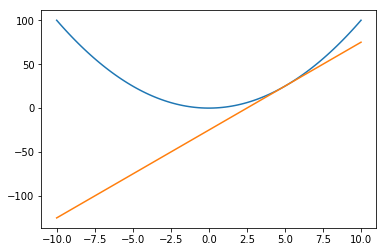

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Generate x
x = np.linspace(-10,10,100)

# Compute y

y = x * x

plt.plot(x,y)

# lets draw a tangent at x=0.5

x0=5
m = slope =2 * x0
y1 = m * x-25
plt.plot(x,y1)

### # differentiate at a point using gradients

In [21]:
import tensorflow as tf
tf.reset_default_graph()
x = tf.constant(5.0)
y = tf.square(x)
z = tf.gradients(y,x)

with tf.Session() as s:
    print(z[0].eval())    

10.0


### # compute gradients using autodiff

In [22]:
reset_graph()

n_epochs = 1000
learning_rate = .01

x = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name="x")
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n+1,1],-1,1,seed=42),name="theta")

y_pred = tf.matmul(x,theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")


In [23]:
gradients = tf.gradients(mse,[theta])[0]

In [24]:
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 ==0:
            print("Epoch=", epoch, "MSE=",mse.eval())
        sess.run(training_op)
       
    best_theta = theta.eval()

print("Best theta :")
print(best_theta)

Epoch= 0 MSE= 9.161543
Epoch= 100 MSE= 0.7145006
Epoch= 200 MSE= 0.56670463
Epoch= 300 MSE= 0.5555716
Epoch= 400 MSE= 0.5488117
Epoch= 500 MSE= 0.5436362
Epoch= 600 MSE= 0.53962916
Epoch= 700 MSE= 0.53650916
Epoch= 800 MSE= 0.5340678
Epoch= 900 MSE= 0.53214717
Best theta :
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


### # find partial derivative of complex function 

In [25]:
def my_func(a,b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
        return z   

In [26]:
my_func(2,4)

2.0

### # gradient descent using this method

In [27]:
reset_graph()

a = tf.Variable(2.0, name="a")
b = tf.Variable(4.0, name="b")
z = tf.constant(0.0,name="z0")
for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)
    
gradient = tf.gradients(z,[a,b])

init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    init.run()
    print(z.eval())
    print(sess.run(gradient))

-1.0089693
[-1.4850847, -0.773633]


### # Implementing gradient descent using an GradientDescentoptimizer

In [29]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

x = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name="x")
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n+1,1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(x, theta, name="prediction")

error = y_pred - y

mse = tf.reduce_mean(tf.square(error), name="mse")


In [30]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(mse)

In [31]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch :", epoch, "MSE", mse.eval())
        sess.run(training_op)
     
    best_theta = theta.eval()

print("Best theta")   
print(best_theta)

Epoch : 0 MSE 9.161543
Epoch : 100 MSE 0.7145006
Epoch : 200 MSE 0.56670463
Epoch : 300 MSE 0.5555716
Epoch : 400 MSE 0.5488117
Epoch : 500 MSE 0.5436362
Epoch : 600 MSE 0.53962916
Epoch : 700 MSE 0.53650916
Epoch : 800 MSE 0.5340678
Epoch : 900 MSE 0.53214717
Best theta
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


### # Implementing Gradient Descent using MomemtumOptimizer

In [32]:
reset_graph()

n_epochs = 1000
learning_rate = .01

x = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name="x")
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n+1,1],-1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(x, theta, name="production")

error = y_pred - y

mse = tf.reduce_mean(tf.square(error), name="mse")


In [33]:
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate, momentum=0.9)
training_op = optimizer.minimize(mse)

In [34]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        sess.run(training_op)
    best_theta = theta.eval()
print("Best Theta")
print(best_theta)

Best Theta
[[ 2.068558  ]
 [ 0.8296286 ]
 [ 0.11875337]
 [-0.26554456]
 [ 0.3057109 ]
 [-0.00450251]
 [-0.03932662]
 [-0.89986444]
 [-0.87052065]]


### # placeholder nodes

In [35]:
reset_graph()

A = tf.placeholder(tf.float32, shape=(None,3))
B = A + 5

with tf.Session() as sess:
    B_value_1 = B.eval(feed_dict = {A: [[1,2,3]]})
    B_value_2 = B.eval(feed_dict = {A: [[4,5,6],[7,8,9]]})
    
print(B_value_1)    
print(B_value_2)

[[6. 7. 8.]]
[[ 9. 10. 11.]
 [12. 13. 14.]]


### # mini batch gradient descent using placeholder nodes

In [36]:
reset_graph()

learning_rate = 0.01

x = tf.placeholder(tf.float32, shape=(None, n +1), name = "x")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([n +1,1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(x, theta, name="prediction")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)

training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()

In [37]:
n_epochs =10
m = housing.target.shape[0]
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)
    indices = np.random.randint(m, size = batch_size)
    x_batch = scaled_housing_data_plus_bias[indices]
    y_batch = housing.target.reshape(-1,1)[indices]
    return x_batch,y_batch


In [38]:
fetch_batch(1,1,3)

(array([[ 1.        , -0.43635204,  0.50539419, -0.55697891, -0.03498224,
          0.39253765,  0.14136418, -0.80147053,  0.67867026],
        [ 1.        ,  0.6177724 , -1.87834817,  0.36763443,  0.05194415,
          1.9820333 ,  0.01268926,  0.99636589, -0.93352196],
        [ 1.        ,  0.07465565,  1.85618152, -0.42575976, -0.28273636,
         -0.39337964, -0.06093361, -0.56737725, -0.07501712]]), array([[1.173],
        [1.948],
        [2.61 ]]))

In [39]:
# this is execution phase

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            x_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict = {x: x_batch, y: y_batch})
            
    best_theta = theta.eval()
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

### # Saving models

In [40]:
# lets save a model
# code for gradient descent optimizer

reset_graph()

n_epochs = 1000
learning_rate = 0.01

x = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name="x")
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name="y")

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(x, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch = ", epoch, "MSE = ",mse.eval())
            save_path = saver.save(sess, "model1_ckps/first_model.ckpt")
        sess.run(training_op)
     
    best_theta = theta.eval()
    save_path = saver.save(sess, "model1_ckps/last_model.ckpt")
    

Epoch =  0 MSE =  9.161543
Epoch =  100 MSE =  0.7145006
Epoch =  200 MSE =  0.56670463
Epoch =  300 MSE =  0.5555716
Epoch =  400 MSE =  0.5488117
Epoch =  500 MSE =  0.5436362
Epoch =  600 MSE =  0.53962916
Epoch =  700 MSE =  0.53650916
Epoch =  800 MSE =  0.5340678
Epoch =  900 MSE =  0.53214717


In [41]:
best_theta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393811],
       [-0.04269556],
       [-0.6614528 ],
       [-0.6375277 ]], dtype=float32)

### # Restoring models

In [42]:
# Restore model

with tf.Session() as sess:
    saver.restore(sess, "model1_ckps/last_model.ckpt")
    best_theta_restored = theta.eval()
    print(best_theta_restored)

INFO:tensorflow:Restoring parameters from model1_ckps/last_model.ckpt
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.6614528 ]
 [-0.6375277 ]]


In [45]:
# check restored theta is same as saved theta

np.allclose(best_theta,best_theta_restored)

True

In [47]:
# By default saver will save and restored all variables under their own name.
# if you need more control then -
# the following saver will save and restore only the theta variable under their own name weight.

saver = tf.train.Saver({'weight':theta})

## Visualizing graph

### Using TensorBoard

### # step-1

In [50]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir ="{}/run-{}/".format(root_logdir,now)

In [57]:
# Mini Batch Gradient Descent

n_epochs=1000
learning_rate=0.01

x = tf.placeholder(tf.float32, shape=(None,n+1), name="x")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0, seed=42),name="theta")
y_pred = tf.matmul(x,theta, name="prediction")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()


### # step-2

In [58]:
# Create a node in the graph that will evaluate the mse

mse_summary = tf.summary.scalar('MSE',mse)

# create a filewriter

filewriter = tf.summary.FileWriter(logdir,tf.get_default_graph())

In [59]:
# calculate the number of batches

n_epochs=10
batch_size=100
n_batches = int(np.ceil(m/batch_size))

In [60]:
# update the execution phase
# evaluate the mse_summary node regularly during training
# and write the summary for even file

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            x_batch,y_batch = fetch_batch(epoch,batch_index,batch_size)
            if batch_index % 10 ==0:
                summary_str = mse_summary.eval(feed_dict={x:x_batch,y:y_batch})
                step = epoch * n_batches + batch_index
                filewriter.add_summary(summary_str,step)
            sess.run(training_op, feed_dict={x : x_batch, y : y_batch})
    best_theta = theta.eval()
    

In [61]:
filewriter.close()

In [65]:
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)